In [2]:
import pandas as pd
import numpy as np
import sklearn 

data loading

In [101]:
##data loading
df = pd.read_csv(r"C:\Users\SOUMYODIP PAL\Downloads\Carbon Emission.csv\Carbon Emission.csv")
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


PREPROCESSING WITH NAN VALUE

In [102]:
df['Body Type'] = df['Body Type'].fillna('Unknown')
df['Diet'] = df['Diet'].fillna('Unknown')
df['How Often Shower'] = df['How Often Shower'].fillna('Unknown')
df['Heating Energy Source'] = df['Heating Energy Source'].fillna('Unknown')
df['Transport'] = df['Transport'].fillna('Unknown')
df['Vehicle Type'] = df['Vehicle Type'].fillna('Unknown')
df['Social Activity'] = df['Social Activity'].fillna('Unknown')
df['Energy efficiency'] = df['Energy efficiency'].fillna('Unknown')
df['Recycling'] = df['Recycling'].fillna('[]')
df['Cooking_With'] = df['Cooking_With'].fillna('[]')

In [107]:
##data cleaning
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [108]:

Sex_encoder = LabelEncoder()
df['Sex'] = Sex_encoder.fit_transform(df['Sex'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])

body_onec = OneHotEncoder()
diet_onec = OneHotEncoder()
shower_onec  = OneHotEncoder()
heating_onec = OneHotEncoder()
transport_onec = OneHotEncoder()
vehicle_onec = OneHotEncoder()
social_onec = OneHotEncoder()
freq_onec = OneHotEncoder()
wasteSize_onec = OneHotEncoder()
energyEff_onec = OneHotEncoder()

body = body_onec.fit_transform(df[['Body Type']]).toarray()
diet = diet_onec.fit_transform(df[['Diet']]).toarray()
shower = shower_onec.fit_transform(df[['How Often Shower']]).toarray()
heating = heating_onec.fit_transform(df[['Heating Energy Source']]).toarray()
transport = transport_onec.fit_transform(df[['Transport']]).toarray()
vehicle = vehicle_onec.fit_transform(df[['Vehicle Type']]).toarray()
social = social_onec.fit_transform(df[['Social Activity']]).toarray()
freq = freq_onec.fit_transform(df[['Frequency of Traveling by Air']]).toarray()
wasteSize = wasteSize_onec.fit_transform(df[['Waste Bag Size']]).toarray()
energyEff = energyEff_onec.fit_transform(df[['Energy efficiency']]).toarray()



In [109]:
body_df = pd.DataFrame(body,columns=body_onec.get_feature_names_out())
diet_df = pd.DataFrame(diet, columns=diet_onec.get_feature_names_out())
shower_df = pd.DataFrame(shower, columns=shower_onec.get_feature_names_out())
heating_df = pd.DataFrame(heating, columns=heating_onec.get_feature_names_out())
transport_df = pd.DataFrame(transport, columns=transport_onec.get_feature_names_out())
vehicle_df = pd.DataFrame(vehicle, columns=vehicle_onec.get_feature_names_out())
social_df = pd.DataFrame(social, columns=social_onec.get_feature_names_out())
freq_df = pd.DataFrame(freq, columns=freq_onec.get_feature_names_out())
wasteSize_df = pd.DataFrame(wasteSize, columns=wasteSize_onec.get_feature_names_out())
energyEff_df = pd.DataFrame(energyEff, columns=energyEff_onec.get_feature_names_out())


In [110]:
df = pd.concat([
    df.drop(columns=[
        'Body Type', 'Diet', 'How Often Shower', 'Heating Energy Source', 
        'Transport', 'Vehicle Type', 'Social Activity', 
        'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency'
    ]),
    body_df, diet_df, shower_df, heating_df, transport_df, 
    vehicle_df, social_df, freq_df, wasteSize_df, energyEff_df
], axis=1)

In [113]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast
import pandas as pd

# Safely convert stringified lists to actual Python lists
df['Recycling'] = df['Recycling'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
df['Cooking_With'] = df['Cooking_With'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Multi-label binarization
recycle_bin = MultiLabelBinarizer()
cook_bin = MultiLabelBinarizer()

recycling = recycle_bin.fit_transform(df['Recycling'])
cooking = cook_bin.fit_transform(df['Cooking_With'])

# Convert to DataFrames
recycling_df = pd.DataFrame(recycling, columns=recycle_bin.classes_)
cooking_df = pd.DataFrame(cooking, columns=cook_bin.classes_)

# Concatenate and drop original columns
df = pd.concat([df.drop(columns=['Recycling', 'Cooking_With']), recycling_df, cooking_df], axis=1)



In [114]:
df.columns

Index(['Sex', 'Monthly Grocery Bill', 'Vehicle Monthly Distance Km',
       'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'CarbonEmission', 'Body Type_normal', 'Body Type_obese',
       'Body Type_overweight', 'Body Type_underweight', 'Diet_omnivore',
       'Diet_pescatarian', 'Diet_vegan', 'Diet_vegetarian',
       'How Often Shower_daily', 'How Often Shower_less frequently',
       'How Often Shower_more frequently', 'How Often Shower_twice a day',
       'Heating Energy Source_coal', 'Heating Energy Source_electricity',
       'Heating Energy Source_natural gas', 'Heating Energy Source_wood',
       'Transport_private', 'Transport_public', 'Transport_walk/bicycle',
       'Vehicle Type_Unknown', 'Vehicle Type_diesel', 'Vehicle Type_electric',
       'Vehicle Type_hybrid', 'Vehicle Type_lpg', 'Vehicle Type_petrol',
       'Social Activity_never', 'Social Activity_often',
       'Social Activity_so

SPLIT THE DATA

In [115]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['CarbonEmission'])
y = df['CarbonEmission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


TRAIN THE XGBOOST

In [116]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

EVALUATION

In [128]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("XGboost Results:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


XGboost Results:
MAE: 116.56718338012695
MSE: 24806.64086735093
RMSE: 157.50124084384518
R2 Score: 0.9761407971382141


FEATURE IMPORTANCE

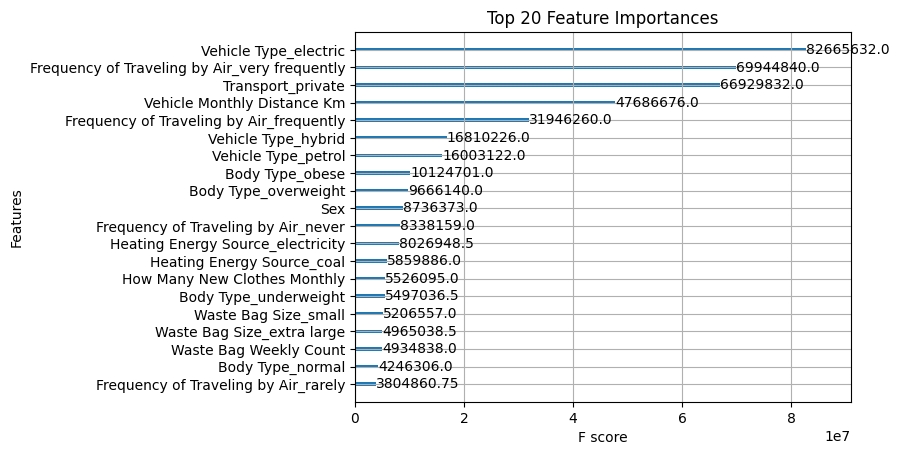

In [122]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Assuming 'xgb_model' is your trained model
plot_importance(model, max_num_features=20, importance_type='gain')  # or 'weight', 'cover'
plt.title('Top 20 Feature Importances')
plt.show()


In [120]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print("CV R2 scores:", scores)
print("Average CV R2:", scores.mean())


CV R2 scores: [0.97514868 0.97688371 0.977108   0.97441894 0.97501087]
Average CV R2: 0.9757140398025512


TRY DIFFERENT MODELS

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RandomForestRegressor Results:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RandomForestRegressor Results:
MAE: 215.28246000000001
MSE: 79542.16743580002
RMSE: 282.0322099261005
R2 Score: 0.9234956909787264


In [127]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lgbm_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("LGBMRegressor Results:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 55
[LightGBM] [Info] Start training from score 2263.556125
LGBMRegressor Results:
MAE: 111.8975937166503
MSE: 22485.37580964044
RMSE: 149.95124477522833
R2 Score: 0.9783733811278322


HYPERPARAMETER TUNING

In [129]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
lgbm_model = LGBMRegressor(random_state=42)

# Hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 50, 100],
    'min_child_samples': [20, 50, 100]
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_lgbm_model = grid_search.best_estimator_
y_pred = best_lgbm_model.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("LGBMRegressor (Tuned) Results:")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 55
[LightGBM] [Info] Start training from score 2263.556125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [130]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
xgb_model = XGBRegressor(random_state=42)

# Hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost (Tuned) Results:")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}
XGBoost (Tuned) Results:
MSE: 16695.669825212193
R2 Score: 0.9839419722557068


SAVE THE MODEL

In [131]:
import joblib

# Save the XGBoost model
joblib.dump(best_xgb_model, 'xgboost_model_tuned.pkl')

['xgboost_model_tuned.pkl']

In [132]:
joblib.dump(body_onec, 'body_onec.pkl')
joblib.dump(diet_onec, 'diet_onec.pkl')
joblib.dump(shower_onec, 'shower_onec.pkl')
joblib.dump(heating_onec, 'heating_onec.pkl')
joblib.dump(transport_onec, 'transport_onec.pkl')
joblib.dump(vehicle_onec, 'vehicle_onec.pkl')
joblib.dump(social_onec, 'social_onec.pkl')
joblib.dump(freq_onec, 'freq_onec.pkl')
joblib.dump(wasteSize_onec, 'wasteSize_onec.pkl')
joblib.dump(energyEff_onec, 'energyEff_onec.pkl')
joblib.dump(Sex_encoder, 'Sex_encoder.pkl')
joblib.dump(recycle_bin, 'recycle_bin.pkl')
joblib.dump(cook_bin, 'cook_bin.pkl')

['cook_bin.pkl']

In [133]:
df.columns

Index(['Sex', 'Monthly Grocery Bill', 'Vehicle Monthly Distance Km',
       'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'CarbonEmission', 'Body Type_normal', 'Body Type_obese',
       'Body Type_overweight', 'Body Type_underweight', 'Diet_omnivore',
       'Diet_pescatarian', 'Diet_vegan', 'Diet_vegetarian',
       'How Often Shower_daily', 'How Often Shower_less frequently',
       'How Often Shower_more frequently', 'How Often Shower_twice a day',
       'Heating Energy Source_coal', 'Heating Energy Source_electricity',
       'Heating Energy Source_natural gas', 'Heating Energy Source_wood',
       'Transport_private', 'Transport_public', 'Transport_walk/bicycle',
       'Vehicle Type_Unknown', 'Vehicle Type_diesel', 'Vehicle Type_electric',
       'Vehicle Type_hybrid', 'Vehicle Type_lpg', 'Vehicle Type_petrol',
       'Social Activity_never', 'Social Activity_often',
       'Social Activity_so